In [1]:
%load_ext itikz
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

palette = sns.color_palette("colorblind", 10)

# A Theory of Collision Spaces
## Where Belief Systems Collide And Diverge (v.0.0.1)

---

*This post has an intended audience. If you spend a lot of time thinking about statistics, probablistic graphical models, gradient ascent, or deep learning then congrats -- it's you! I want you to see how I see the core problem of social media because you are the best positioned group to effect change. But -- assuming I did a half-decent job -- anyone well-versed in probablistic or computational thinking will easily follow along. I do apologize for the length though. This is a projection of my dissertation, and I’m still searching for good compressions.*

---

## Asocial Attention Allocation

Imagine a space of all contexts your environment allows you to interact in,

In [2]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=positioning,shapes,shapes.geometric,fit --as-jinja

\node (a) {\phantom a};
\node (b) [right=20 cm of a] {\phantom b};

\draw[|-|,thick] (a) -- (b);

Zooming in,

In [3]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=positioning,shapes,shapes.geometric,fit --as-jinja

\begin{scope}[xshift=3cm, yshift=-0.25cm]
\draw[thick] (0, 0) -- (2, 0) -- (2, 0.5) -- (0, 0.5) -- (0, 0);
\node at (0, -0.2) {$i$};
\end{scope}

\node (a) {\phantom a};
\node (b) [right=20 cm of a] {\phantom b};

\draw[|-|,thick] (a) -- (b);

each square represents a context.

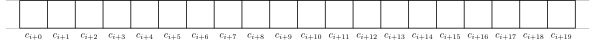

In [4]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=positioning,shapes,shapes.geometric,fit --as-jinja

\draw[thin,gray] (0, 0) -- (-0.5, 0);
\draw[thin,gray] (0, 1) -- (-0.5, 1);
\draw[thin,gray] (20, 0) -- (20.5, 0);
\draw[thin,gray] (20, 1) -- (20.5, 1);
\draw[thick] (0, 0) -- (0, 1);
{% for i in range(20) %}
\begin{scope}[xshift={{i}}cm]
    \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
    \node (i{{i}}) at (0.5cm, -0.3cm) {$c_{i+{{i}}}$};
\end{scope}
{% endfor %}

Knowing the distributions of payoffs assigned by the environment to each context as well as our particular objective function, we could derive a mapping to expected utility. Visually -- where the area is proportional to magnitude, red is negative, and, green is positive -- you have something like,

In [5]:
import random


def clip(w):
    return min(max(w, 0), 1)

random.seed(43)
weights = [random.random()**2 for i in range(20)]
censored = [random.random() < 0.94 for i in range(20)]
colors = [random.choice(['negaff', 'posaff']) for i in range(20)]
alter_weights = [max(0, min(1, w+(random.random()-0.5)/4)) for w in weights]
sum(censored)

19

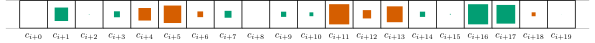

In [6]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit --as-jinja
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275}
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0}
\draw[thin,gray] (0, 0) -- (-0.5, 0);
\draw[thin,gray] (0, 1) -- (-0.5, 1);
\draw[thin,gray] (20, 0) -- (20.5, 0);
\draw[thin,gray] (20, 1) -- (20.5, 1);
\draw[thick] (0, 0) -- (0, 1);
{% for i in range(20) %}
    {% set w = weights[i] %}
    {% set color = colors[i]%}
\begin{scope}[xshift={{i}}cm]
    \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
    \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}}); 
    \node (i{{i}}) at (0.5cm, -0.3cm) {$c_{i+{{i}}}$};
\end{scope}
{% endfor %}

If you enter and interact with context $c_{i+16}$, you can expect to obtain $\pi_i$ utils. Limited to $[c_{i+0}, c_{i+19}]$, this is the maximum value.^[I'm indexing with $i+k$ to emphasize that the portrayed contexts are a mere slice of the stupidly-large whole.] So given these options and assuming an immediate maximization motive, you select context $c_{i+16}$, anticipating the maximum reward (on average).

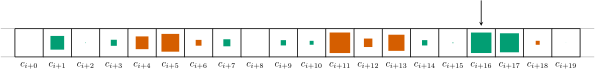

In [7]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit --as-jinja
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275}
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0}
\draw[thin,gray] (0, 0) -- (-0.5, 0);
\draw[thin,gray] (0, 1) -- (-0.5, 1);
\draw[thin,gray] (20, 0) -- (20.5, 0);
\draw[thin,gray] (20, 1) -- (20.5, 1);
\draw[thick] (0, 0) -- (0, 1);
{% for i in range(20) %}
    {% set w = weights[i] %}
    {% set color = colors[i]%}
\begin{scope}[xshift={{i}}cm]
    {% if i == 16 %}
    \draw [thick, >=stealth, ->] (0.5, 2) -- (0.5, 1.1);
    {% endif %}
    \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
    \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}}); 
    \node (i{{i}}) at (0.5cm, -0.3cm) {$c_{i+{{i}}}$};
\end{scope}
{% endfor %}

Except, the expectations aren't things we inspect to make a decision. Instead, they're automatically translated into [something like a *propensity* for action/context selection](https://generativist.falsifiable.com/beliefs/a-toy-belief-model), even at the layer of perception.^[In my dissertation, expectations were squashed with a [Boltzmann distribution](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution) (i.e. softmax layer). Given the dynamic temperature parameter -- modulated by how often asocial and social expectations were met, as well as an experiential aspiration level -- there were periods where "bad" context selection become more probable.] You won't always select the best one. You'll very rarely select bad (negative util) ones. Over time, you'll sample over all contexts in some proportion to your expectations,

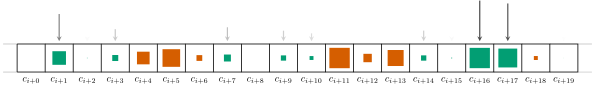

In [8]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit --as-jinja
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275}
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0}
\draw[thin,gray] (0, 0) -- (-0.5, 0);
\draw[thin,gray] (0, 1) -- (-0.5, 1);
\draw[thin,gray] (20, 0) -- (20.5, 0);
\draw[thin,gray] (20, 1) -- (20.5, 1);
\draw[thick] (0, 0) -- (0, 1);
{% for i in range(20) %}
    {% set w = weights[i] %}
    {% set color = colors[i]%}
\begin{scope}[xshift={{i}}cm]
    {% if w > 0 and colors[i] == 'posaff'%}
    \draw [very thick, >=stealth, ->, black!{{w*100}}] (0.5, 1.1+{{w*2}}) -- (0.5, 1.1);
    {% endif %}
    \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
    \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}}); 
    \node (i{{i}}) at (0.5cm, -0.3cm) {$c_{i+{{i}}}$};
\end{scope}
{% endfor %}

However, this assumes unreasonable three things:

1. We know the context-associated payoffs;
2. Our needs are stationary; and,
3. The environment is stationary.


The first assumption is unreasonable because "[t]he [real environment is altogether too big, too complex, and too fleeting for direct acquaintance](https://amzn.to/3rZnaIB)." Or, simply stated: our lives are finite and the set of things we can do is not. [Fitness proportionate selection](https://en.wikipedia.org/wiki/Fitness_proportionate_selection) context sampling *helps* to get more robust and focused expectations, over time. But there just isn't enough time to sufficiently sample every possible context while also exploiting enough of them to go on surviving.^[This problem structure is the bread and butter of reinforcement learning. For a wonderful and rigorous introduction, see [Sutton and Barto's Second Edition Textbook on the subject](https://amzn.to/30pdoUc).] The second assumption is unreasonable to anyone who has spent time alive. At any given moment, our needs may change. And, the third claim is unreasonable to anyone who has intellectually developed to the point of object permanency. Some aspects of our environment change slower than others, but change seems to be the only constant. 

Thus, accrued expected *unconditional* utility alone isn't sufficient. We need something else to grapple with these aspects of our ever-shifting reality. That "something" is attention.^[You can also use conditional utility. But, they're surprisingly difficult to make consistent. How much of one thing compensates for how much of another, over the Cartesian product of things, is impressively intractable. Censorship cuts the Gordian Knot.]

What does attention do?

It censors.

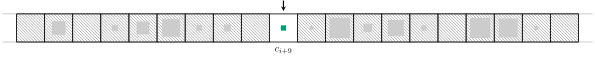

In [9]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit,patterns --as-jinja
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275}
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0}

\draw[thin,gray] (0, 0) -- (-0.5, 0);
\draw[thin,gray] (0, 1) -- (-0.5, 1);
\draw[thin,gray] (20, 0) -- (20.5, 0);
\draw[thin,gray] (20, 1) -- (20.5, 1);
\draw[thick] (0, 0) -- (0, 1);


{% for i in range(20) %}
    {% set w = weights[i] %}
    {% set color = colors[i]%}
    
\begin{scope}[xshift={{i}}cm]
    \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
    {% if censored[i] %}
        \draw[pattern=north west lines, pattern color=gray] (0,0) rectangle (1, 1);
        \fill[black!20, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
    {% else %}
    \draw [very thick, >=stealth, ->, black] (0.5, 1.1+{{w*2}}) -- (0.5, 1.1);
        \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
        \node (i{{i}}) at (0.5cm, -0.3cm) {$c_{i+{{i}}}$};
    {% endif %}
\end{scope}
{% endfor %}

If the environment affords a limited set of contexts at the moment, only those are cognitively available. If some needs are critical at the moment (think, [Maslow](https://en.wikipedia.org/wiki/Maslow%27s_hierarchy_of_needs)), only those are perceptually accessible. If we feel secure, attention assigns an implicit bonus to novelty, facilitating exploration. If we feel threatened, attention retreats to safe and reliable familiarity. If how we spend our time is how we spend our lives, attention is the project manager.

## Dyadic Attention Allocation

While the environment is too big relative to our *individual* lives, we need not explore alone. Sociality is a fucking super power. *We* can integrate *our* observations and experiences, filling in more of the map than we could ever hope to in isolation.

But, how?

I've illustrated expectations-as-belief-elements as something like a vector for the sake of simplicity.^[I'm treating beliefs and expectations as almost synonyms in this post. But, they aren't in general or in my dissertation. The expected payoffs in a particular context also depend on how you play within it. But adding that aspect would bloat and already bloated post.] But, they aren't that. There is no intrinsic index. You can't exchange them en masse. 

This demands a familiar solution: we point.

One party selects a context and initiates an exchange; the other receives, recognizes, and accepts it.^[There are lots of models for both communication and public opinion. This particular line alludes to [Zaller's RAS model](https://amzn.to/3twlmqO).<br><br>] If this negotiation is successful, the context is shared and information exchange can occur,^[This process is so fundamental to conversations that we almost forget that it is there. The easiest way to see it? Try conversing with someone who doesn't speak your language -- watch how quickly abstract pointing reverts to concrete, physical gesticulation.]

In [10]:
alice_weights = [0.9, 0.48, -0.1, 0.21, -0.45, 0.63, 0.8, -0.25, 0.0, 0.19, 0.14, -0.4, 0.3, 0.2, -0.19, 0.03, 0.2, 0.1, 0.14,  -.9]
bob_weights   = [0.0, 0.47,  0.1, 0.6,  -0.45, -0.5, 0.85, 0.25, 0.0, 0.6, 0.4,   -0.2, 0.3, 0.5, -0.19, -0.8, 0.4, -0.1, -0.14, -.8]

In [11]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit,patterns --as-jinja
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275}
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0}

\draw[thin,gray] (0, 0) -- (-0.5, 0);
\draw[thin,gray] (0, 1) -- (-0.5, 1);
\draw[thin,gray] (20, 0) -- (20.5, 0);
\draw[thin,gray] (20, 1) -- (20.5, 1);
\draw[thick] (0, 0) -- (0, 1);

\begin{scope}[yshift=-1.6cm]
\draw[thin,gray] (0, 0) -- (-0.5, 0);
\draw[thin,gray] (0, 1) -- (-0.5, 1);
\draw[thin,gray] (20, 0) -- (20.5, 0);
\draw[thin,gray] (20, 1) -- (20.5, 1);
\draw[thick] (0, 0) -- (0, 1);
\end{scope}


\node[rotate=90] at (-0.3, 0.5cm) {Alice};
\node[rotate=90] at (-0.3, -1.1cm) {Bob};

{% for i in range(20) %}
    {% set w = alice_weights[i] %}
    {% set color = ['negaff', 'posaff'][w>0] %}
    
\begin{scope}[xshift={{i}}cm]
    \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
    {% if i != 12 %}
        \draw[pattern=north west lines, pattern color=gray] (0,0) rectangle (1, 1);
        \fill[black!20, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
    {% else %}
        \node (i{{i}}) at (0.5cm, -0.3cm) {$c_{i+{{i}}}$};
        \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
    {% endif %}
    
\end{scope}
{% endfor %}

{% for i in range(20) %}
    {% set w = bob_weights[i] %}
    {% set color = ['negaff', 'posaff'][w>0] %}
    
\begin{scope}[xshift={{i}}cm, yshift=-1.6 cm]
    \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
    {% if i != 12 %}
        \draw[pattern=north west lines, pattern color=gray] (0,0) rectangle (1, 1);
        \fill[black!20, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
    {% else %}
        \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
    {% endif %}
\end{scope}
{% endfor %}

\draw[black, very thick, rounded corners=2mm] (11.8, -2) rectangle (13.2, 1.5);

But after context selection, then what?

We can't easily share the expectations as statistical objects because,

1. [Our beliefs are latent structures](https://generativist.falsifiable.com/beliefs/a-toy-belief-model). We cannot (readily) inspect them (directly). Instead, we sample over them. 
2. [Words are not great at conveying probabilities](https://waf.cs.illinois.edu/visualizations/Perception-of-Probability-Words/) or statistical confidence.
3. It's hard to express expectations as objective utils because those, for the most part, do not exist. 

But, *we do seem to be able to share expressions of 'good' or 'bad' pretty well*. The magnitudes may be fuzzy but the valence can be clear. And, if we want to convey the magnitude, we can do so by pointing again -- *time itself is a good metric.*

Thus, ignoring symmetry, Alice and Bob find themselves in one of two cases: (1) Alice and Bob agree as to the valence; (2) they do not. 

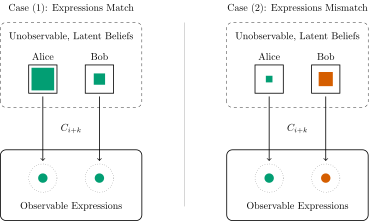

In [12]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit,patterns --as-jinja
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275};
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0};


\begin{scope}
    \node at (1.5, 3) {Case (1): Expressions Match};

    \begin{scope}
        \draw[black, thick] (0, 0) rectangle (1, 1);
        \node at (0.5, 1.3) {Alice};
        \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
        \node[rectangle,fill, minimum size=0.8cm,posaff] (b) at (0.5, 0.5) {};

        \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (0.5, -3) {};
        \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -3) {};

        \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
    \end{scope}

    \begin{scope}[xshift=2cm]
       \draw[black, thick] (0, 0) rectangle (1, 1);
        \node at (0.5, 1.3) {Bob};
        \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
        \node[rectangle,fill, minimum size=0.4cm,posaff] (b) at (0.5, 0.5) {};

        \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (0.5, -3) {};
        \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -3) {};

        \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
    \end{scope}

    \draw[black, dashed, rounded corners=2mm] (-1, -0.5) rectangle (4, 2.5);
    \node at (1.5, 2) {Unobservable, Latent Beliefs};

    \draw[black, thick, rounded corners=2mm] (-1, -4.5) rectangle (4, -2);
    \node at (1.5, -4) {Observable Expressions};

    \node at (1.5, -1.25) {$C_{i+k}$};
\end{scope}

\draw[black!40] (5.5, 2.5) -- (5.5, -4);

\begin{scope}[xshift=8cm]
    \node at (1.5, 3) {Case (2): Expressions Mismatch};

    \begin{scope}
        \draw[black, thick] (0, 0) rectangle (1, 1);
        \node at (0.5, 1.3) {Alice};
        \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
        \node[rectangle,fill, minimum size=0.2cm,posaff] (b) at (0.5, 0.5) {};

        \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (0.5, -3) {};
        \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -3) {};

        \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
    \end{scope}

    \begin{scope}[xshift=2cm]
       \draw[black, thick] (0, 0) rectangle (1, 1);
        \node at (0.5, 1.3) {Bob};
        \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
        \node[rectangle,fill, minimum size=0.5cm,negaff] (b) at (0.5, 0.5) {};

        \node[circle,fill, minimum size=0.2cm,negaff]    (d) at (0.5, -3) {};
        \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -3) {};

        \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
    \end{scope}

    \draw[black, dashed, rounded corners=2mm] (-1, -0.5) rectangle (4, 2.5);
    \node at (1.5, 2) {Unobservable, Latent Beliefs};

    \draw[black, thick, rounded corners=2mm] (-1, -4.5) rectangle (4, -2);
    \node at (1.5, -4) {Observable Expressions};

    \node at (1.5, -1.25) {$C_{i+k}$};
\end{scope}

Assuming that people share samples over their *sincere expectations* derived from unbiased experiences generated by *objective REALITY*, the best information integration objective function is expression matching. The mathematical form of the associated update rule varies. But, stated simply: both Alice and Bob should update their beliefs (expectations) such that they are more likely to obtain case (1) in the future than case (2). 

What does this purchase?

Well, talk is cheap! Not in the sense that it is valueless. It's not. But, relative to the cost of directly interrogating some aspect of our environment, communication takes less time, effort, and, very often, risk.  If Alice ate the poisonous red berries, she can tell Bob not to. If Bob climbed a mountain and found it barren, Alice doesn't have to repeat the experiment. 

**Sociality is an [ensemble method](https://en.wikipedia.org/wiki/Ensemble_learning)!**

It works well if participants sample contexts in proportion to how important it has been to them (here, the magnitude).^[It also needs an attenuation mechanism. SYN/ACK/INHIBIT/EOM. Otherwise, information gain is minimal and opportunity cost is high. I don't discuss that further in this post.] The effective span of our experiences expands in the amalgamation. To make this more concrete, consider the following,

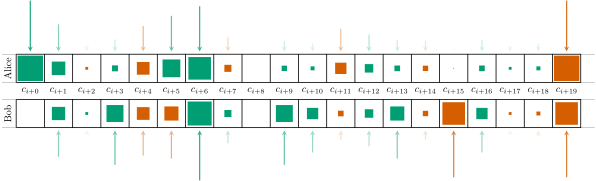

In [13]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit --as-jinja
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275}
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0}

\node[rotate=90] at (-0.3, 0.5cm) {Alice};
\node[rotate=90] at (-0.3, -1.1cm) {Bob};

\begin{scope}
    \draw[thin,gray] (0, 0) -- (-0.5, 0);
    \draw[thin,gray] (0, 1) -- (-0.5, 1);
    \draw[thin,gray] (20, 0) -- (20.5, 0);
    \draw[thin,gray] (20, 1) -- (20.5, 1);
    \draw[thick] (0, 0) -- (0, 1);
    {% for i in range(20) %}`
        {% set w = alice_weights[i] %}
        {% set color = ['negaff', 'posaff'][w>0] %}
        \begin{scope}[xshift={{i}}cm]
            \draw [very thick, >=stealth, ->, {{color}}!{{w|abs*100}}] (0.5, 1.1+{{w|abs*2}}) -- (0.5, 1.1);
            \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
            \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}}); 
            \node (i{{i}}) at (0.5cm, -0.3cm) {$c_{i+{{i}}}$};
        \end{scope}
    {% endfor %}
\end{scope}


\begin{scope}[yshift=-1.6cm]
    \draw[thin,gray] (0, 0) -- (-0.5, 0);
    \draw[thin,gray] (0, 1) -- (-0.5, 1);
    \draw[thin,gray] (20, 0) -- (20.5, 0);
    \draw[thin,gray] (20, 1) -- (20.5, 1);
    \draw[thick] (0, 0) -- (0, 1);
    {% for i in range(20) %}
        {% set w = bob_weights[i] %}
        {% set color = ['negaff', 'posaff'][w>0] %}
        \begin{scope}[xshift={{i}}cm]
            \draw [very thick, >=stealth, ->, {{color}}!{{w|abs*100}}] (0.5, -1.1*{{w|abs*2}}) -- (0.5, -0.1);
            \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
            \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}}); 
        \end{scope}
    {% endfor %}
\end{scope}

with a few vignettes:

- **Reward improvement**: In $c_{i+0}$, Alice expects big rewards. More than that, to Alice, this context is the best one. She'll initiate exchange in this context frequently. Meanwhile, Bob's expects nothing. Combined, fitness proportionate selection and an (assumed) tame payoff distribution^[It's easy to adapt to a Guassian; it's not easy to adapt to a powerlaw. Learning rates and distributions can conspire in ways to produce something like degenerate expectations.] means Alice has explored this context a lot. Meanwhile, Bob has not. If Alice communicates her assessment and Bob accepts it -- with [the effect](https://en.wikipedia.org/wiki/Law_of_effect) that he increases his expectations of the context -- he's more likely to explore it in the future, asocially. 
- **Error correction**: Alice believes $c_{i+5}$ has a positive payoff; Bob believes it is negative. Assuming a homogeneous environment, one of them is wrong. If the error is Alice's, social exchange helps her avoid asocial penalties; if the mistake is Bob's, social exchange helps him realize higher average returns. 
- **Loss avoidance confirmation**: Both Bob and Alice have believe that $c_{i, 19}$ exacts terrible penalties. When interacting with their asocial environment, they avoid this context. *But, socially, expression doesn't impose a loss*. And, avoiding a loss is just as important as realizing a gain, so its worth talking about. However, since they already share this belief, there is little if any improvement possible.

## Dyadic Credit Assignment

Asocial and social payoffs get mixed together. In the latter case, expression matching is provably useful given sincere expressions and a homogeneous environment. That's not a bad starting point. People have a drive towards cooperation. And, at least given time and space as bounds, the differences in our environments aren't grand. But [the evolution of cooperation](https://amzn.to/3eR7bZs) seems to have afforded us with the ability and need to perceive and monitor for deception...

...and, [to punish it](https://en.wikipedia.org/wiki/Tit_for_tat#Tit_for_two_tats). 

Thus, the expression matching rule is conditional on trust. Trust is another belief. It has the same mechanics. We sample over it when entering a social context. If we trust our alter, we expect that their expressions are sincere, reliable, and drawn from the same experience-generating environment as ours. For example, in the following figure, Alice and Bob enter the context with sampled trust in both cases.^[In this simplified model, trust doesn't condition expression itself. That is, people don't shape expression to suit social expectations. In THE REAL WORLD, they obviously do. But, I'm more interested in how deviations emerge even given sincere expression. Moreover, in the case of social media with one-to-many audiences, something like unconditional expressions manifests more readily.]

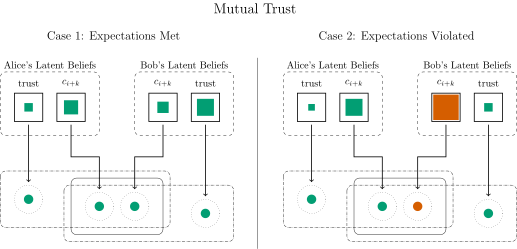

In [14]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit,patterns --as-jinja
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275};
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0};

% https://hugoideler.com/2013/01/tikz-node-connector/
\newcommand*{\connectorH}[4][]{
  \draw[#1] (#3) -| ($(#3) !#2! (#4)$) |- (#4);
}
\newcommand*{\connectorV}[4][]{
  \draw[#1] (#3) |- ($(#3) !#2! (#4)$) -| (#4);
}

\begin{scope}
\begin{scope}
      
    \begin{scope}
        \node at (-0.25, 2) {Alice's Latent Beliefs};
        \draw[black, dashed, rounded corners=2mm] (-2, -0.5) rectangle (1.5, 1.75);

        \begin{scope}
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.5cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {$c_{i+k}$};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (1.5, -3) {};
            \node[circle, draw, dotted, minimum size=1cm, black] (c) at (1.5, -3) {};

            \connectorV[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm]{0.50}{a}{c};
        \end{scope}

        \begin{scope}[xshift=-1.5cm]
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.3cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {trust};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (0.5, -2.75) {};
            \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -2.75) {};

            \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
        \end{scope}
    \end{scope}

    \begin{scope}[xshift=4.75cm]
        \node at (-0.25, 2) {Bob's Latent Beliefs};
        \draw[black, dashed, rounded corners=2mm] (-2, -0.5) rectangle (1.5, 1.75);

        \begin{scope}[xshift=-1.5cm]
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.4cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {$c_{i+k}$};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (-0.5, -3) {};
            \node[circle, draw, dotted, minimum size=1cm, black] (c) at (-0.5, -3) {};

            \connectorV[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm]{0.50}{a}{c};
        \end{scope}

        \begin{scope}
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.6cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {trust};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (0.5, -3.25) {};
            \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -3.25) {};

            \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
        \end{scope}
    \end{scope}


    \draw[black, rounded corners=2mm] (0.5, -2) rectangle (3.75, -4);
    %\node at (2.125, -4) {Shared observables};

    \draw[black, rounded corners=2mm, densely dashdotted] (-2, -1.75) rectangle (4, -3.75);
    \begin{scope}[xshift=2.25cm,yshift=-0.5cm]
        \draw[black, rounded corners=2mm, densely dashdotted] (-2, -1.75) rectangle (4, -3.75);
    \end{scope}
\end{scope}
                             
\begin{scope}[xshift=10cm]
      
    \begin{scope}
        \node at (-0.25, 2) {Alice's Latent Beliefs};
        \draw[black, dashed, rounded corners=2mm] (-2, -0.5) rectangle (1.5, 1.75);

        \begin{scope}
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.6cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {$c_{i+k}$};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (1.5, -3) {};
            \node[circle, draw, dotted, minimum size=1cm, black] (c) at (1.5, -3) {};

            \connectorV[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm]{0.50}{a}{c};
        \end{scope}

        \begin{scope}[xshift=-1.5cm]
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.2cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {trust};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (0.5, -2.75) {};
            \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -2.75) {};

            \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
        \end{scope}
    \end{scope}

    \begin{scope}[xshift=4.75cm]
        \node at (-0.25, 2) {Bob's Latent Beliefs};
        \draw[black, dashed, rounded corners=2mm] (-2, -0.5) rectangle (1.5, 1.75);

        \begin{scope}[xshift=-1.5cm]
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.9cm,negaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {$c_{i+k}$};

            \node[circle,fill, minimum size=0.2cm,negaff]    (d) at (-0.5, -3) {};
            \node[circle, draw, dotted, minimum size=1cm, black] (c) at (-0.5, -3) {};

            \connectorV[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm]{0.50}{a}{c};
        \end{scope}

        \begin{scope}
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.3cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {trust};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (0.5, -3.25) {};
            \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -3.25) {};

            \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
        \end{scope}
    \end{scope}


    \draw[black, rounded corners=2mm] (0.5, -2) rectangle (3.75, -4);
    %\node at (2.125, -4) {Shared observables};

    \draw[black, rounded corners=2mm, densely dashdotted] (-2, -1.75) rectangle (4, -3.75);
    \begin{scope}[xshift=2.25cm,yshift=-0.5cm]
        \draw[black, rounded corners=2mm, densely dashdotted] (-2, -1.75) rectangle (4, -3.75);
    \end{scope}
\end{scope}
\end{scope}
                                              
\draw (7.1, 2.25) -- (7.1, -4.5);
\node at (2, 3) {\large Case 1: Expectations Met};
\node at (12, 3) {\large Case 2: Expectations Violated};
\node at (7, 4) {\Large Mutual Trust};                        

Given trust, they both use the expression-matching update rule.^[Social priming has been the cause for much scientific alarm lately. It's one of the things at the core of the replication crisis. [Kahneman](https://www.nature.com/news/polopoly_fs/7.6716.1349271308!/suppinfoFile/Kahneman%20Letter.pdf) even wrote an open letter about it.<br><br>Am I asserting social priming effects? Weakly. Affective transference and contagion are on more solid ground, [especially in computer-mediated social environments](Experimental evidence of massive-scale emotional contagion through social networks). And, mostly, this process is about the *co*-presentation of information. All I'm asserting is that we're very good at finding efficient codings for our environment.<br><br>The inter-collision space lingering consequences (discussed below) come closest to being a questionable priming effect. Except, we're very good at picking up these cues in online spaces. Plus "today's guy on the internet" contexts turn them into games. And we're good at games, too -- even if we don't realize we're playing them.<br><br>Anyways, [an uplifted banana's tweet](https://twitter.com/literalbanana/status/1373075765604970497) (indirectly) compelled this defense. The internet is wild, man.] 

In case (1), their expectations are met. They reinforce both their expressed (matching) beliefs and their trust in the episode's counter-party. 

In case (2), their is an imbalance. They anticipated trust which implies expression matching. They did not obtain that outcome. Thus, both Alice and Bob adapt by: trusting each other less; and, moving their beliefs towards each others', given that the matching rule was selected for the episode. 

The second case is more interesting because it exposes a critical challenge for social learning and information exchange: **you cannot easily distinguish between unreliable counterparties, deceptive ones, and whether or not you are wrong**. So moving both trust and the particular belief is sensible. If they were deceptive or wrong, trust guards your expectations from future exchanges; the belief gets corrected by direct experience and other prosocial encounters. If they are right and your belief corrects, subsequent encounters with them will move back towards trust.^[The difference in learning rates between trust and the particular belief does matter, too. But that's a bit too in the weeds for this post.]

Thus, the rule is adaptive.

...mostly.

The potential problem becomes apparent when we relax the common environment assumption. In a heterogeneous one -- where payoff distributions are a function of *some observable aspect of the participant* -- expressions diverge because experiences do. If some of your counterpart's experiences are not realizable to you, information conveyed about that context isn't useful. **But, we can't easily identify which expressions differ because of conditional distributions and which differ because of unreliable samples (or deception).**

When placed in these contexts, trust moves towards distrust. But, before distrust becomes the mode, we're mixing beliefs together in a way that essentially integrates noise. That is, we're almost unlearning what we know about our environment in that context. 

However, the collapse towards distrust is not inevitable. **If the expectation-weighted sum in homogeneous contexts outweighs the sum of the sign-mismatched heterogeneous ones we can still maintain trust**.^[I don't give the mathematical form in this post because it requires specification of both the learning and selection rules, which get complicated and aren't otherwise empirically-grounded.] Information loss in the divergent contexts still occurs, but we still realize gains from the ensemble in homogeneous ones.

But, there is another learning rule to consider. If an agent anticipates distrust, mismatched expressions reinforce that anticipation. That is, if you anticipate distrust and realize mismatched expressions, it's a confirmation. Distrust strengthens. Conversely, if you anticipate distrust and matching occurs, distrust weakens.^[Both illustrations had Alice and Bob both sampling similarly-valenced trust. This need not occur though. That is, in any particular episode, Alice may trust Bob even though Bob distrusts Alice, and vice versa. And, this state isn't necessarily observable to the alter.]

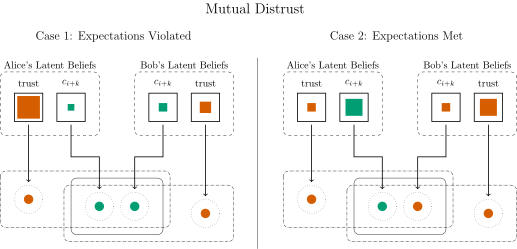

In [15]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit,patterns --as-jinja
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275};
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0};

% https://hugoideler.com/2013/01/tikz-node-connector/
\newcommand*{\connectorH}[4][]{
  \draw[#1] (#3) -| ($(#3) !#2! (#4)$) |- (#4);
}
\newcommand*{\connectorV}[4][]{
  \draw[#1] (#3) |- ($(#3) !#2! (#4)$) -| (#4);
}

\begin{scope}
\begin{scope}
      
    \begin{scope}
        \node at (-0.25, 2) {Alice's Latent Beliefs};
        \draw[black, dashed, rounded corners=2mm] (-2, -0.5) rectangle (1.5, 1.75);

        \begin{scope}
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.2cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {$c_{i+k}$};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (1.5, -3) {};
            \node[circle, draw, dotted, minimum size=1cm, black] (c) at (1.5, -3) {};

            \connectorV[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm]{0.50}{a}{c};
        \end{scope}

        \begin{scope}[xshift=-1.5cm]
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.8cm,negaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {trust};

            \node[circle,fill, minimum size=0.2cm,negaff]    (d) at (0.5, -2.75) {};
            \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -2.75) {};

            \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
        \end{scope}
    \end{scope}

    \begin{scope}[xshift=4.75cm]
        \node at (-0.25, 2) {Bob's Latent Beliefs};
        \draw[black, dashed, rounded corners=2mm] (-2, -0.5) rectangle (1.5, 1.75);

        \begin{scope}[xshift=-1.5cm]
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.3cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {$c_{i+k}$};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (-0.5, -3) {};
            \node[circle, draw, dotted, minimum size=1cm, black] (c) at (-0.5, -3) {};

            \connectorV[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm]{0.50}{a}{c};
        \end{scope}

        \begin{scope}
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.4cm,negaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {trust};

            \node[circle,fill, minimum size=0.2cm,negaff]    (d) at (0.5, -3.25) {};
            \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -3.25) {};

            \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
        \end{scope}
    \end{scope}


    \draw[black, rounded corners=2mm] (0.5, -2) rectangle (3.75, -4);
    %\node at (2.125, -4) {Shared observables};

    \draw[black, rounded corners=2mm, densely dashdotted] (-2, -1.75) rectangle (4, -3.75);
    \begin{scope}[xshift=2.25cm,yshift=-0.5cm]
        \draw[black, rounded corners=2mm, densely dashdotted] (-2, -1.75) rectangle (4, -3.75);
    \end{scope}
\end{scope}
                             
\begin{scope}[xshift=10cm]
      
    \begin{scope}
        \node at (-0.25, 2) {Alice's Latent Beliefs};
        \draw[black, dashed, rounded corners=2mm] (-2, -0.5) rectangle (1.5, 1.75);

        \begin{scope}
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.6cm,posaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {$c_{i+k}$};

            \node[circle,fill, minimum size=0.2cm,posaff]    (d) at (1.5, -3) {};
            \node[circle, draw, dotted, minimum size=1cm, black] (c) at (1.5, -3) {};

            \connectorV[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm]{0.50}{a}{c};
        \end{scope}

        \begin{scope}[xshift=-1.5cm]
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.3cm,negaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {trust};

            \node[circle,fill, minimum size=0.2cm,negaff]    (d) at (0.5, -2.75) {};
            \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -2.75) {};

            \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
        \end{scope}
    \end{scope}

    \begin{scope}[xshift=4.75cm]
        \node at (-0.25, 2) {Bob's Latent Beliefs};
        \draw[black, dashed, rounded corners=2mm] (-2, -0.5) rectangle (1.5, 1.75);

        \begin{scope}[xshift=-1.5cm]
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.3cm,negaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {$c_{i+k}$};

            \node[circle,fill, minimum size=0.2cm,negaff]    (d) at (-0.5, -3) {};
            \node[circle, draw, dotted, minimum size=1cm, black] (c) at (-0.5, -3) {};

            \connectorV[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm]{0.50}{a}{c};
        \end{scope}

        \begin{scope}
            \draw[black, thick] (0, 0) rectangle (1, 1);
            \node[rectangle, black, thick, minimum size=1cm] (a) at (0.5, 0.5) {};
            \node[rectangle,fill, minimum size=0.6cm,negaff] (b) at (0.5, 0.5) {};
            \node[above=.1cm of a] {trust};

            \node[circle,fill, minimum size=0.2cm,negaff]    (d) at (0.5, -3.25) {};
            \node[circle, draw, dotted, minimum size=1cm, black]    (c) at (0.5, -3.25) {};

            \draw[->, =>stealth, thick, shorten <=0.1cm, , shorten >=0.1cm] (a) -- (c);
        \end{scope}
    \end{scope}


    \draw[black, rounded corners=2mm] (0.5, -2) rectangle (3.75, -4);
    %\node at (2.125, -4) {Shared observables};

    \draw[black, rounded corners=2mm, densely dashdotted] (-2, -1.75) rectangle (4, -3.75);
    \begin{scope}[xshift=2.25cm,yshift=-0.5cm]
        \draw[black, rounded corners=2mm, densely dashdotted] (-2, -1.75) rectangle (4, -3.75);
    \end{scope}
\end{scope}
\end{scope}
                                              
\draw (7.1, 2.25) -- (7.1, -4.5);
\node at (2, 3) {\large Case 1: Expectations Violated};
\node at (12, 3) {\large Case 2: Expectations Met};
\node at (7, 4) {\Large Mutual Distrust};                        

But, how to do you integrate this social experience into the referent belief?


What seems to happen far too readily (in modern, networked environments) is that when we anticipate distrust and realize mismatched expressions, we reinforce both our distrust AND our mismatched expressions. We adapt by negation.

Again, this need not occur indefinitely. 

In cases where the context is homogeneous, so long as our asocial (or other social) exposures to that context occur frequently enough, the errors eventually correct. Or, as before, so long as we're exchanging information in enough homogeneous (or similarly-valenced contexts), the same is true. But, if these contexts occur frequently enough, **then distrust becomes *socially* stable**. And, because trust *isn't* limited to a single context, **information annihilation by negation spreads**.



## Computer-Mediated Sociality

In the examples above, trust -- as a belief -- was attached to a particular identity. "Bob's trusts Alice" or "Alice distrusts Bob." This assignment works when geography binds social interactions. But, social mediums remove exactly that constraint. At any moment, we can (and do!) interact with people all over the word. 

[Our dyadic possibilities explode](https://en.wikipedia.org/wiki/Metcalfe%27s_law),

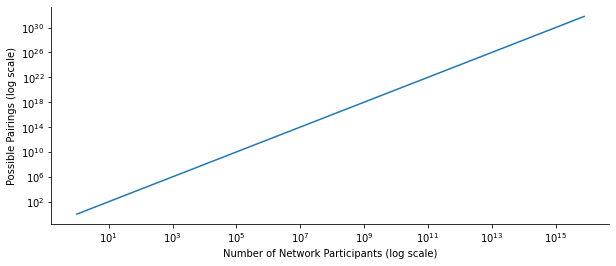

In [16]:
plt.figure(figsize=(10, 4))
n = np.logspace(0, np.log(8_000_000))
plt.plot(n, n**2)
plt.semilogx()
plt.semilogy()
plt.xlabel("Number of Network Participants (log scale)")
plt.ylabel("Possible Pairings (log scale)")
sns.despine();

In such an environment, we can't bind trust to each particular identity we pair off with. It doesn't scale that way.^[[In a previous post](https://generativist.falsifiable.com/metaverse/dunbars-number-is-quadratic) I made this point in a different way. Dunbar's number is actually about people we interact with and how they relate to each other. Given geographic confinement, the environment does a lot of the heavy lifting. But, without that constraint the true nature of Dunbar's number is revealed: it's a quadratic problem, not a linear one.<br><br>If you read that post previously and didn't get it, that's my fault. It was too incomplete a picture. But, it may make more sense now. ]  But, we also don't have to. **We're not the only thing maintaining our relationships anymore.** That's exactly what computer-mediated social mediums mediate: our relationships!

Thus, as an adaptation, we generalize. Our big brains lean on the environment as much as possible, finding useful points of generalizing leverage. 

We learn to stereotype.

...*prolifically*.

That is, we discover and construct identity cues, then attach trust to them.^[I'm using stereotype in an unconventional way. Rather than an elaborate image that represents various properties associated with particular cues, I'm using it as a proxy for the trust associated with those cues. "Stereotyped trust" would be better term, but it's a mouthful.<br></br>] Given a particular, contextually-relevant stereotype (i.e. the alter expresses or the ego perceives the cue), trust works as previously illustrated.^[This process happens offline, too. However, it is the lack of geographical confinement that makes it particularly reliable and insidious online.<br><br>]

To understand the effects of large-environment navigation by stereotyping, consider the following small subset of beliefs (same context in each column) and users (rows),^[There's a connection to Azuma's [Otaku: Japan's Database Animals](https://amzn.to/3qXCaW8) that [Brett Fujioka](https://twitter.com/Brett_Fujioka) and [Adam Elkus](https://twitter.com/Aelkus) brought up after I shared bits of my dissertation on twitter a long time ago. It's worth exploring.]

In [17]:
random.seed(46)
params = [(random.uniform(1, 3), random.uniform(1, 3)) for i in range(20)]


ws = [[random.betavariate(*p)*2-1 for p in params] for i in range(20)]

async_ctx = [3, 3, 9, 9, 3, 3, 18, 18, 7, 7]

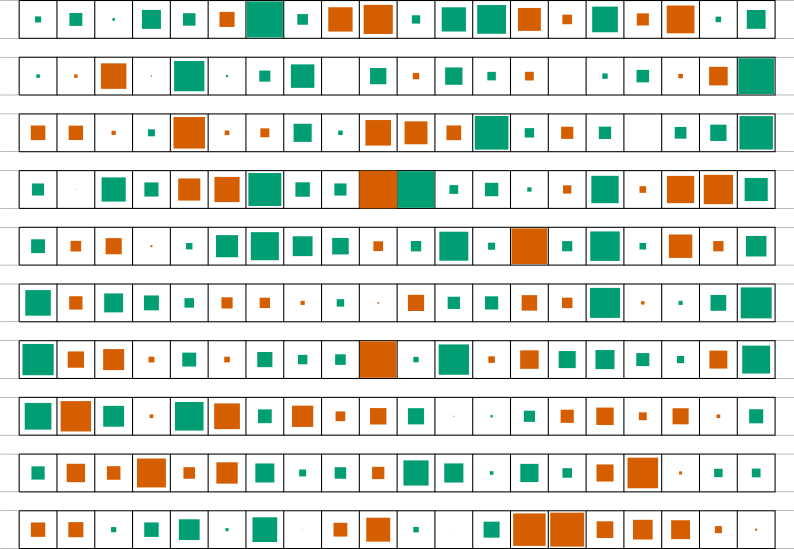

In [23]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit,patterns --as-jinja --rasterize
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275}
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0}


{% for frame in range(10) %}
    \begin{scope}[yshift={{frame*1.5}}cm]
        \draw[thin,gray] (0, 0) -- (-0.5, 0);
        \draw[thin,gray] (0, 1) -- (-0.5, 1);
        \draw[thin,gray] (20, 0) -- (20.5, 0);
        \draw[thin,gray] (20, 1) -- (20.5, 1);
        \draw[thick] (0, 0) -- (0, 1);
    \end{scope}
    
    {% for i in range(20) %}
        {% set w = ws[frame][i] %}
        {% set color = 'posaff' if w > 0 else 'negaff'%}
        \begin{scope}[xshift={{i}}cm, yshift={{frame*1.5}}cm]
            \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
            \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
        \end{scope}
    {% endfor %}
{% endfor %}


%\draw[black, very thick, rounded corners=2mm] (11.8, -2) rectangle (13.2, 1.5);

If the probability of two users interacting was unconditional and uniform, then this environment still acts as a means of ensemble learning. Agents would pair off in their particular contexts and exchange information. The same condition would hold as before: so long as the set of homogeneous (or similarly-valenced) contexts dominated deliberation, trust would be the mode and we'd enjoy error correction.

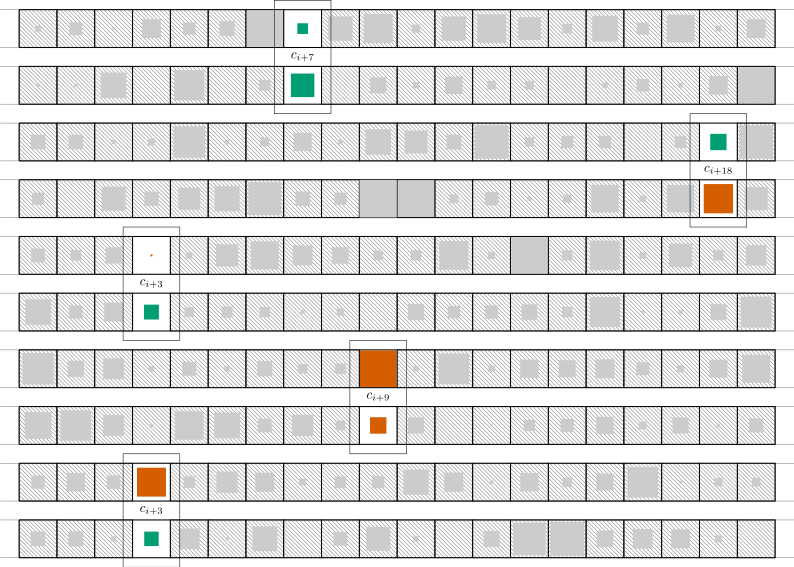

In [25]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit,patterns --as-jinja --rasterize
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275}
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0}


{% for frame in range(10) %}
    \begin{scope}[yshift={{frame*1.5}}cm]
        \draw[thin,gray] (0, 0) -- (-0.5, 0);
        \draw[thin,gray] (0, 1) -- (-0.5, 1);
        \draw[thin,gray] (20, 0) -- (20.5, 0);
        \draw[thin,gray] (20, 1) -- (20.5, 1);
        \draw[thick] (0, 0) -- (0, 1);
    \end{scope}
    
    {% for i in range(20) %}
        {% set w = ws[frame][i] %}
        {% set color = 'posaff' if w > 0 else 'negaff'%}
        \begin{scope}[xshift={{i}}cm, yshift={{frame*1.5}}cm]
            \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
            %\fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
        
            {% if i != async_ctx[frame] %}
                \draw[pattern=north west lines, pattern color=gray] (0,0) rectangle (1, 1);
                \fill[black!20, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
            {% else %}
                {% if frame % 2 == 1 %}
                \node (i{{i}}) at (0.5cm, -0.25cm) {$c_{i+{{i}}}$};
                {% endif %}
                \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
            {% endif %}
        
        \end{scope}
    {% endfor %}
    
    {% if frame % 2 == 1 %}
        \begin{scope}[yshift={{3*(frame//2)}}cm]
            \draw ({{async_ctx[frame]-0.25}}, -0.25) rectangle ({{async_ctx[frame]+1+0.25}}, 2.75);
        \end{scope}
    {% endif %}
{% endfor %}


%\draw[black, very thick, rounded corners=2mm] (11.8, -2) rectangle (13.2, 1.5);

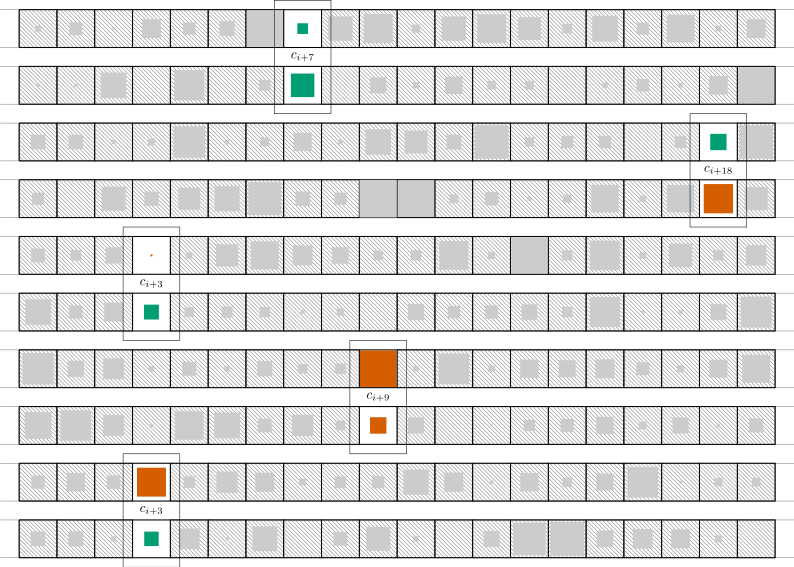

In [28]:
from IPython.display import Image  # KLUDGE before airport
Image("./pairwise.png", metadata={"primary": True})

Except, the interaction probabilities are neither unconditional nor uniform. And context selection isn't only a function of individual, isolated expectations. 

## Collision Spaces (Finally!)

Whether by [supernode one-to-many messaging](https://generativist.falsifiable.com/metaverse/the-real-supernode-problem) or shared salience, social mediums amplify via synchronization.^[Is it possible to do amplification without synchronization? I don't think so. They're almost synonymous. But, on the time dimension, you can find ways to stretch out the synchronization context. Deferred or time-pinned messages, staking, etc. Since total interaction time is still fixed, this could almost act like a smoothing filter.] This induces path-dependencies in evaluation which can lead to something like an attitudinal [recency bias](https://en.wikipedia.org/wiki/Recency_bias) at a sociological level. 

In collison spaces, the realized paths have particularly bad effects.

### Stage 0: A Precipitating Event

Some observable event occurs that selects for and sychronizes on a context that has a mixture of positively- and negatively-valenced beliefs,

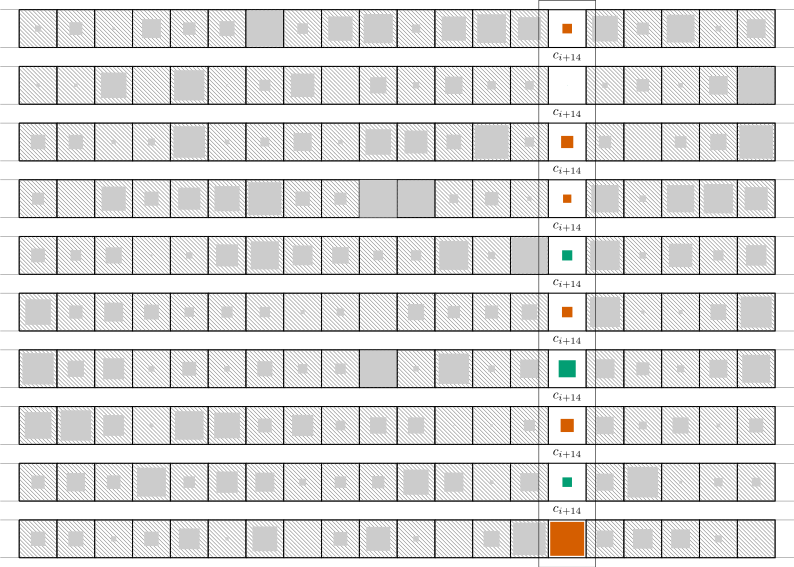

In [21]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=calc,positioning,shapes,shapes.geometric,fit,patterns --as-jinja --rasterize
\definecolor{posaff}{rgb}{0.00784313725490196, 0.6196078431372549, 0.45098039215686275}
\definecolor{negaff}{rgb}{0.8352941176470589, 0.3686274509803922, 0.0}


{% for frame in range(10) %}
    \begin{scope}[yshift={{frame*1.5}}cm]
        \draw[thin,gray] (0, 0) -- (-0.5, 0);
        \draw[thin,gray] (0, 1) -- (-0.5, 1);
        \draw[thin,gray] (20, 0) -- (20.5, 0);
        \draw[thin,gray] (20, 1) -- (20.5, 1);
        \draw[thick] (0, 0) -- (0, 1);
    \end{scope}
    
    {% for i in range(20) %}
        {% set w = ws[frame][i] %}
        {% set color = 'posaff' if w > 0 else 'negaff'%}
        \begin{scope}[xshift={{i}}cm, yshift={{frame*1.5}}cm]
            \draw[thick] (0, 0) -- (1, 0) -- (1, 1) -- (0, 1);
            %\fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
        
            {% if i != 14 %}
                \draw[pattern=north west lines, pattern color=gray] (0,0) rectangle (1, 1);
                \fill[black!20, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
            {% else %}
                {% if frame != 0 %}
                \node (i{{i}}) at (0.5cm, -0.25cm) {$c_{i+{{i}}}$};
                {% endif %}
                \fill[{{color}}, shift={({{0.5-w/2}}, {{0.5-w/2}})}] (0, 0) rectangle ({{w}}, {{w}});
            {% endif %}
        
        \end{scope}
    {% endfor %}
{% endfor %}

\draw (13.75, -0.25) rectangle (15.25, 14.75);


%\draw[black, very thick, rounded corners=2mm] (11.8, -2) rectangle (13.2, 1.5);

*The divergent valences are identity-correlated*. This could be due to a difference in the asocial distributions.^[This is where a lot of asserted zero-sum games emerge.] But, it need not be! Since social and asocial experiences mix together during back-propagation, the experiential difference may be a function only of social construction. All that's required for an event to serve as a collision space *initiator* is that initiating groups partitioned by identity have differently signed expectations with respect to whatever is (even obliquely!) referenced.

Such conditions are easily met.

### Stage 1: Adversarial Amplification

The initial divergence need not span all groups. Or, even many of them. Instead, it's more likely to find its start as a salient context between two *often* adversarial groups (read: sub-cultures). They're chronically-attuned to each others' expressions so that they can do something like ritual battle.

This battle draws a crowd.

And as the crowd (attention) grows, so does assumed importance. People who don't necessarily identify with the initiators feel compelled to render a judgment because everyone else seems to be doing so. Stop walking on a crowded street and look up; then, watch everyone follow your lead. Same principle. Except, *there is something to look at.* It may be trivial, but everyone else seems to care a lot. There seems to be a lot at stake. 

Ignoring the late-comers that identify with the initial identities, identities themselves are correlated with others. This creates an avenue for adversarial recruitment. 

Why? 

I claimed above that we manufacture and rely on stereotypes to navigate the large social environment that is online. And, those stereotypes act just like other beliefs -- they capture experience into a simple assessment of (subjective) reliability. When placed into any particular context, observable cues constrict which stereotypes are accessible.^[Some extremely online examples include the 🇺🇸 emoji in the display name or "pronouns in bio."] From that subset, we sample. And, again, the propensity to select any particular stereotype is a function of its magnitude, too. If a very negatively-valenced stereotype is accessible at the same time a weakly positive one is, there is a probablistic pressure on the former.

But remember,

1. The initial groups adopted an adversarial posture because their expectations seemed to expose an underlying and in some ways "wrong" group-contingent deviation; that,
2. Was easy for those groups to recognize with social cues.

Because the initial context *could* act as a seed between the two initial opposed identities, it probably still has (a somewhat shrunken) force between other ones. 

*But, the adversarial nature makes it easier than that*, and boosts the reliability of stereotypes further. Belligerence sets in. The initial context mixes with *explicit* stereotypical assertions. Everyone starts providing everyone else with judgment shortcuts. The boundary between the referent context and social evaluation blurs.

It's almost tautological; but what's more reliable than a tautology? 

### Stage 2: Social Snow Crash (Entropy)

Because we obtain social rewards for matching *like-me* and social penalties for matching *like-adversary* -- and these payoffs mix together with our asocial or other-social ones -- *our direct experiences are unlearned*. Constrained to the particular explicit-but-relevance-fadding context, the damage to any particular associated belief could be significant. But, life tends to correct them with varying haste. Reality grounds us.^[A recent mixed example of this was the initial response to COVID in early 2020, which shows how identity-contingent expression (not modeled here), matters, too. In the early phases, scientific experts got stuck on identity because of the identities of those sounding the alarm. In private, COVID-19 *could* be serious; in public, COVID-19 was a xenophobic panic. Beliefs got partitioned by these cues.<br><br>However, because science is remarkably good at updating beliefs given more evidence, the scientific consensus shrunk the identity component of the equation towards zero, at least for experts. In one of the fastest and most remarkable public opinion flips I can think of, the polarized expressions traded places. Liberals and leftists who generally have high trust in science and scientists (bordering on or trespassing into scientism), shifted towards "coronavirus is serious." Meanwhile, more rightward leaning people reacting to the left-side's flip -- and given their lower trust in science and scientists -- integrated the negation. Coronavirus became "just the flu," a position taken by many on the left early on!<br><br>
Obviously, this story is a simplification. But it superficially illustrates the process well.<br><br>] 

Except, the effects and therefore damage of collision spaces escape any particular event's context. They reduce average trust, *synchronously*. 

This average reduction isn't spread uniformly over all identity cues. Instead, the negative mass tends to accrue to stereotypes that crystallize the most frequently accessible and experienced oppositions. Because we sample more from stereotypes of high magnitude, the effect is amplified. Negative stereotypes (low trust) become more likely to be sampled, *and more reliable in future collision spaces, too*. We obtain self-fulfilling adversarial stability. And -- assuming the decision-making costs imposed on the group with the now errant belief are less than the social rewards to matching like-them and mismatching unlike-them -- this stability can maintain what is essentially integrated noise.^[For this reason, the worst of collision space contexts are almost those that are otherwise meaningless. Our direct experience can't ground us in that context; but the cost isn't to that context alone.<br><br>]

Reiterating, this occurs because we're looking for short cuts. The space of all experiences is too big, so we have to socially mix our expectations. But, we need something to guard us against unreliable or deceptive participants. So we rely on stereotypical trust. 

*And why wouldn't we!?*

Where $n$ is the number of possible contexts, $m$ is the number of possible people to interact with, and $k$ is the number of stereotypes, 

$$(n \gg k) \land (m \gg k)$$

Additionally, we manufacture stereotypes when we *find* reliable cues. But we forget them given disuse, too. So $k$ shrinks towards those that are experientially useful.^[And, this assumes $m$ doesn't impose a quadratic problem!]

The final result?

Collision spaces produce a horrible outcome. *Social cues mal-adaptively increase the unconditional variance of expressions while minimizing the group-conditioned variance*. That is, a large amount of the observable variance is-become "explained" by identity cues *in the spaces where we spend our time*.^[When a liberal (conservative) calls another user a bot (NPC), they're saying that their predictive model for the opposed identity easily explains the response -- no elaboration required. It's mostly a statement about the accuser's shitty cognitive process. Most social media expressions are extremely low-resolution. It's a natural filter that brushes away finer gradations.<br><br>] But, this deviation is an artifact of the learning environment. 

An illusion -- but one that binds.^[I want to emphasize something here: this process affects everyone. Any "consensus" you perceive and approximate on, say, twitter is probably an artifact of the interaction patterns that the platform selects for, and that probability rises with follower count. You can build up all the epistemological tools you want. But the effects are pretty inescapable and require constant resistance.]

## So what?

Restated, collision spaces collide manufactured identities in contexts where the associated groups have diametrically opposed beliefs. Chronically-allocated attention in these spaces teaches us to *over*-rely on identity cues in information processing. As a result, we annihilate hard-won knowledge drawn from our direct or pro-social experiences by integrating socially-patterned noise. This annihilation transcends any particular context through increased, self-reinforcing distrust, corroding the process of belief expression and discovery itself.

None of this requires deception or bad faith actors. That's not to say they don't exist. In fact, they're legion.^[The most effective ones know how to say something innocuous in most conditional way possible. They *DELIBERATELY* manipulate expression so that one group sees antagonism and the other sees a banal statement. It's particularly effective because if you can't see the skilled manipulation, everyone asserting it looks like they're wildly delusional. "Bad faith" is what you say when you smell this pattern.] But the pathological results can emerge from the over-amplification of difference alone. If "information is the resolution of uncertainty," collision spaces make us certain about some things (what we know about identities) at the expense of others (what we know about the world).

Again, learning about identities *is* adaptive. It helps us cope with our environment.^[Aside: What's the difference between cultural appropriation and assimilation? To the person doing the appropriation, absolutely nothing! Seriously. More often than not, the appropriated signifier is just worn as an aesthetic ornament. Something fashionable that affords a minor means of distinction. To the appropriated group? The cost is often real. That symbol may have been one that helped organize beliefs over conditional payoff distributions. By diluting its predictive value, their ability to navigate suffers. Of course, this description is mostly useful *in theory*. In practice, figuring out when adoption is a boon to assimilation or acculturation and when it is a cost imposed on the appropriated is hard. There are no simple rules where lived experiences diverge.] Because our time is finite and the world is too large, we *must* rely upon experiential trust (among other things) to keep our beliefs hygienic. There are some ways to opt out. But, if part of your goal includes something like maximizing what you can know about the world, opting out is wildly expensive.

My goal in writing this (and my dissertation) was to try and figure out what aspects *of our environment* frustrate this process. Because that's where I want to focus. And where I want other people to focus. I am and remain a true believer in the power of social media. But, I also believe our brains are stupidly impressive. The "we have Paleolithic emotions, medieval institutions and godlike technology" takes are wrong and painfully indulgent. Drop a group of people anywhere in the world, and watch them first survive, then adapt the environment as they see fit. 

Our brains are just fine. The human operating system is just fine. [It's been deployed to production for a long time](https://twitter.com/chaosprime/status/1248861223501942784). Some of our engineered social artifacts remain less tested.

Which makes sense...

...we're still in the early innings of growing cybernetic spaces. 

---


### Postscript

**If you are working on social mediums and think I may be a good fit for your team -- at any stage of venture -- [please reach out](https://twitter.com/generativist).**

*Otherwise, [follow me on twitter](https://twitter.com/generativist). I haven't made an RSS/email notifier for Falsifiable yet. But, if you [subscribe to my substack](https://generativist.substack.com/), I'll announce when I do.*

---

### Related Posts:

- [The Manufacture of Active Impotence: Or, Everyone, For the Love of God, Shut the Fuck Up](https://generativist.falsifiable.com/metaverse/the-manufacture-of-active-impotence)
- [The Real Supernode Problem: Or, When Barack Obama Tweets](https://generativist.falsifiable.com/metaverse/the-real-supernode-problem)
- [Ambient Intimacy is Intimacy](https://generativist.falsifiable.com/metaverse/ambient-intimacy-is-intimacy)
- **[Dunbar's Number is Quadratic: Or, Inference in Relational Space is Human-Hard](https://generativist.falsifiable.com/metaverse/dunbars-number-is-quadratic)**
- [On Censorship: Centralized Social Partitions Considered Harmful](https://generativist.falsifiable.com/metaverse/centralized-social-partitions-considered-harmful)
- [A Toy Belief Model: Or, Don't Let Me Eat Those Red Berries](https://generativist.falsifiable.com/beliefs/a-toy-belief-model)
- [Why Simulate Belief Systems: Complex Adaptive Systems are Bigger Than Your Brain](https://generativist.falsifiable.com/beliefs/why-simulate-beliefs)
- [What Social Should Look Like? Ephemeral By Default, P2P, and Algorithmically-Mediated](https://generativist.falsifiable.com/metaverse/what-should-social-look-like)
- [Probablistic P2P Content Moderation: Propagation is a Liberating Constraint In The Accoustic Space](https://generativist.falsifiable.com/metaverse/probablistic-p2p-content-moderation)